In [123]:
# mounting google drive on colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

In [125]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
from lightgbm import LGBMClassifier

In [127]:
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [128]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [129]:
for i in data.columns:
  data[i].fillna(data[i].mean(), inplace=True)

In [130]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [131]:
y=data['Class']
x=data.drop(['Class'],axis=1)

In [132]:
x=np.array(x)
y=np.array(y)

In [133]:
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.35)

# Exploratory Data Analysis

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

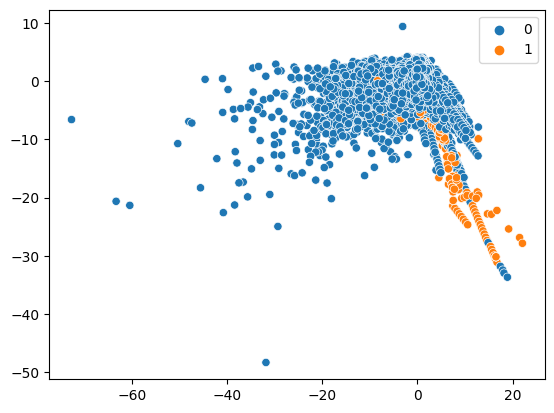

In [135]:
sns.scatterplot(x=x[:,2],y=x[:,3],hue=y)

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

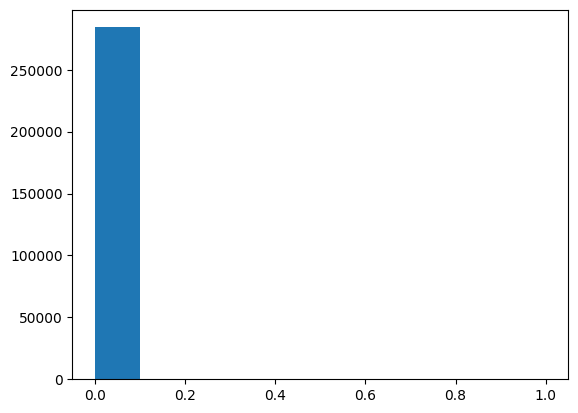

In [136]:
plt.hist(x=y)

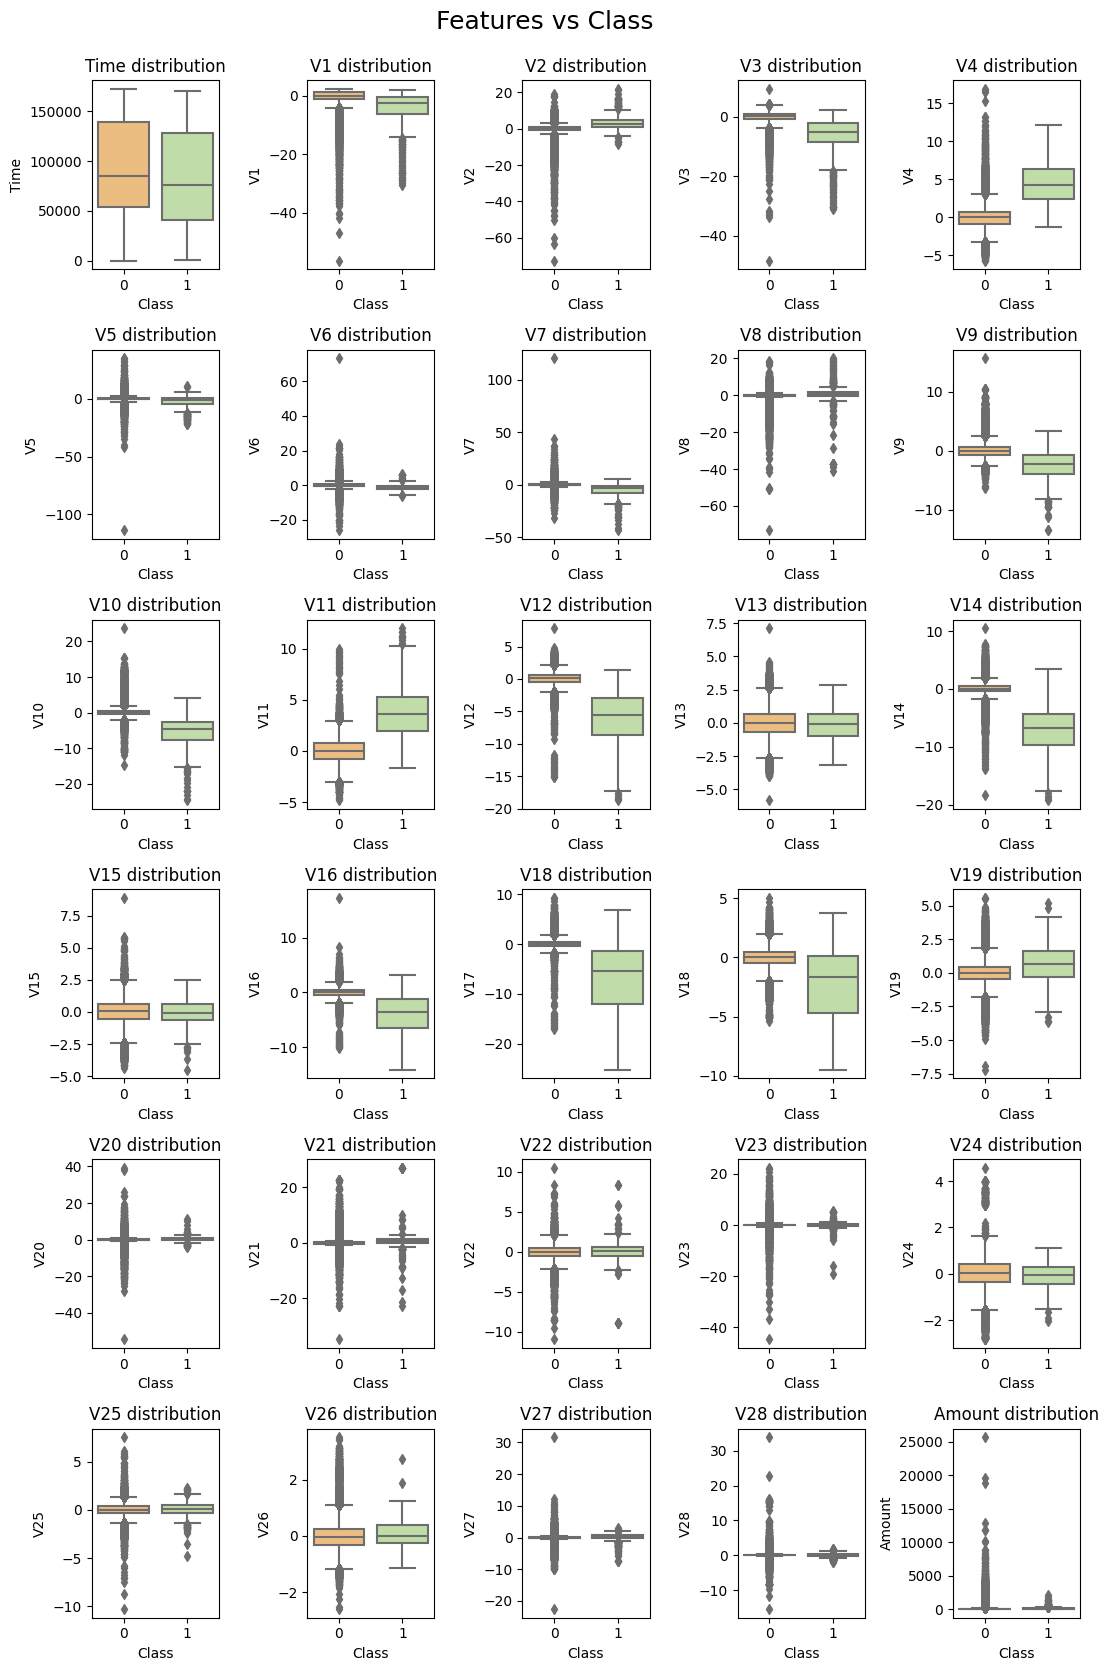

In [137]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=data, x='Class', y='Time', palette='Spectral')
axes[0,0].set_title("Time distribution")

sns.boxplot(ax=axes[0, 1], data=data, x='Class', y='V1', palette='Spectral')
axes[0,1].set_title("V1 distribution")

sns.boxplot(ax=axes[0, 2], data=data, x='Class', y='V2', palette='Spectral')
axes[0,2].set_title("V2 distribution")

sns.boxplot(ax=axes[0, 3], data=data, x='Class', y='V3', palette='Spectral')
axes[0,3].set_title("V3 distribution")

sns.boxplot(ax=axes[0, 4], data=data, x='Class', y='V4', palette='Spectral')
axes[0,4].set_title("V4 distribution")

sns.boxplot(ax=axes[1, 0], data=data, x='Class', y='V5', palette='Spectral')
axes[1,0].set_title("V5 distribution")

sns.boxplot(ax=axes[1, 1], data=data, x='Class', y='V6', palette='Spectral')
axes[1,1].set_title("V6 distribution")

sns.boxplot(ax=axes[1, 2], data=data, x='Class', y='V7', palette='Spectral')
axes[1,2].set_title("V7 distribution")

sns.boxplot(ax=axes[1, 3], data=data, x='Class', y='V8', palette='Spectral')
axes[1,3].set_title("V8 distribution")

sns.boxplot(ax=axes[1, 4], data=data, x='Class', y='V9', palette='Spectral')
axes[1,4].set_title("V9 distribution")

sns.boxplot(ax=axes[2, 0], data=data, x='Class', y='V10', palette='Spectral')
axes[2,0].set_title("V10 distribution")

sns.boxplot(ax=axes[2, 1], data=data, x='Class', y='V11', palette='Spectral')
axes[2,1].set_title("V11 distribution")

sns.boxplot(ax=axes[2, 2], data=data, x='Class', y='V12', palette='Spectral')
axes[2,2].set_title("V12 distribution")

sns.boxplot(ax=axes[2, 3], data=data, x='Class', y='V13', palette='Spectral')
axes[2,3].set_title("V13 distribution")

sns.boxplot(ax=axes[2, 4], data=data, x='Class', y='V14', palette='Spectral')
axes[2,4].set_title("V14 distribution")

sns.boxplot(ax=axes[3, 0], data=data, x='Class', y='V15', palette='Spectral')
axes[3,0].set_title("V15 distribution")

sns.boxplot(ax=axes[3, 1], data=data, x='Class', y='V16', palette='Spectral')
axes[3,1].set_title("V16 distribution")

sns.boxplot(ax=axes[3, 2], data=data, x='Class', y='V17', palette='Spectral')
axes[3,2].set_title("V17 distribution")

sns.boxplot(ax=axes[3, 3], data=data, x='Class', y='V18', palette='Spectral')
axes[3,2].set_title("V18 distribution")

sns.boxplot(ax=axes[3, 4], data=data, x='Class', y='V19', palette='Spectral')
axes[3,4].set_title("V19 distribution")

sns.boxplot(ax=axes[4, 0], data=data, x='Class', y='V20', palette='Spectral')
axes[4,0].set_title("V20 distribution")

sns.boxplot(ax=axes[4, 1], data=data, x='Class', y='V21', palette='Spectral')
axes[4,1].set_title("V21 distribution")

sns.boxplot(ax=axes[4, 2], data=data, x='Class', y='V22', palette='Spectral')
axes[4,2].set_title("V22 distribution")

sns.boxplot(ax=axes[4, 3], data=data, x='Class', y='V23', palette='Spectral')
axes[4,3].set_title("V23 distribution")

sns.boxplot(ax=axes[4, 4], data=data, x='Class', y='V24', palette='Spectral')
axes[4,4].set_title("V24 distribution")

sns.boxplot(ax=axes[5, 0], data=data, x='Class', y='V25', palette='Spectral')
axes[5,0].set_title("V25 distribution")

sns.boxplot(ax=axes[5, 1], data=data, x='Class', y='V26', palette='Spectral')
axes[5,1].set_title("V26 distribution")

sns.boxplot(ax=axes[5, 2], data=data, x='Class', y='V27', palette='Spectral')
axes[5,2].set_title("V27 distribution")

sns.boxplot(ax=axes[5, 3], data=data, x='Class', y='V28', palette='Spectral')
axes[5,3].set_title("V28 distribution")

sns.boxplot(ax=axes[5, 4], data=data, x='Class', y='Amount', palette='Spectral')
axes[5,4].set_title("Amount distribution")

plt.tight_layout()
plt.show()

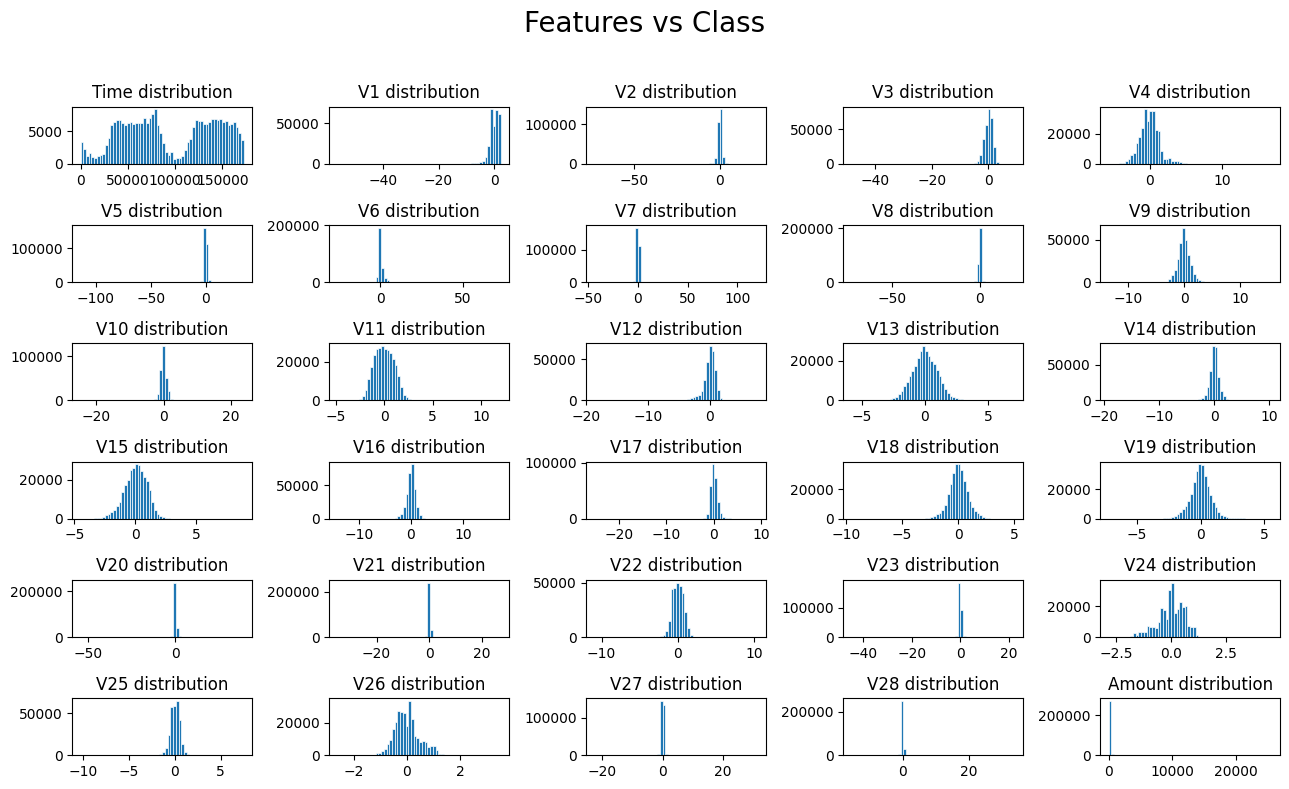

In [138]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(13,8))
fig.suptitle('Features vs Class\n', size = 20)

axes[0,0].hist(data['Time'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("Time distribution")

axes[0,1].hist(data['V1'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V1 distribution");

axes[0,2].hist(data['V2'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V2 distribution");

axes[0,3].hist(data['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,3].set_title("V3 distribution");

axes[0,4].hist(data['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,4].set_title("V4 distribution");

axes[1,0].hist(data['V5'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V5 distribution");

axes[1,1].hist(data['V6'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V6 distribution");

axes[1,2].hist(data['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V7 distribution");

axes[1,3].hist(data['V8'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,3].set_title("V8 distribution");

axes[1,4].hist(data['V9'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,4].set_title("V9 distribution");

axes[2,0].hist(data['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V10 distribution");

axes[2,1].hist(data['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(data['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V12 distribution");

axes[2,3].hist(data['V13'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,3].set_title("V13 distribution");

axes[2,4].hist(data['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,4].set_title("V14 distribution");

axes[3,0].hist(data['V15'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("V15 distribution");

axes[3,1].hist(data['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("V16 distribution");

axes[3,2].hist(data['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("V17 distribution");

axes[3,3].hist(data['V18'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,3].set_title("V18 distribution");

axes[3,4].hist(data['V19'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,4].set_title("V19 distribution");

axes[4,0].hist(data['V20'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("V20 distribution");

axes[4,1].hist(data['V21'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("V21 distribution");

axes[4,2].hist(data['V22'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("V22 distribution");

axes[4,3].hist(data['V23'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,3].set_title("V23 distribution");

axes[4,4].hist(data['V24'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,4].set_title("V24 distribution");

axes[5,0].hist(data['V25'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("V25 distribution");

axes[5,1].hist(data['V26'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("V26 distribution");

axes[5,2].hist(data['V27'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("V27 distribution");

axes[5,3].hist(data['V28'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,3].set_title("V28 distribution");

axes[5,4].hist(data['Amount'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,4].set_title("Amount distribution");

plt.tight_layout()
plt.show()

Distribution of Amount for Fradulent & Genuine transactions

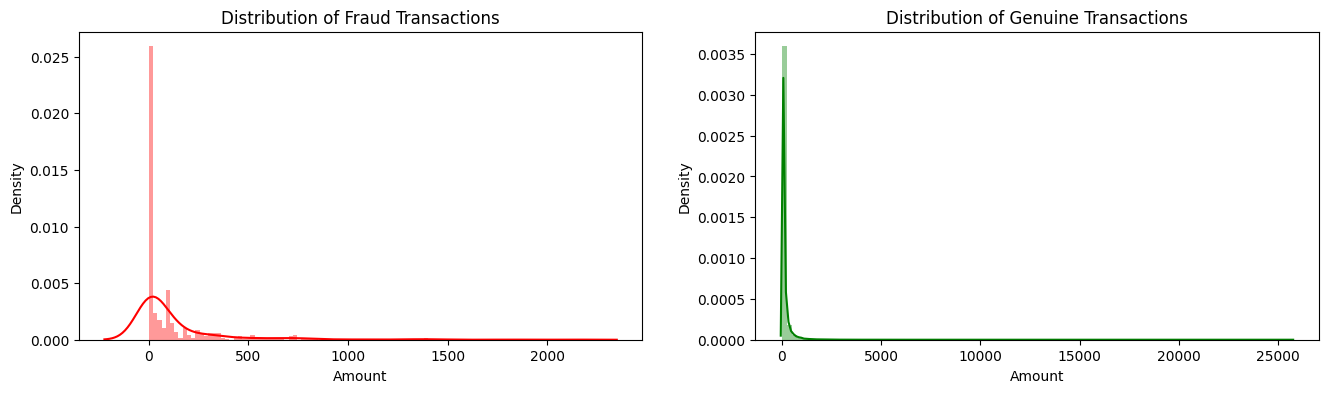

In [139]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(data[data['Class'] == 1]['Amount'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(data[data['Class'] == 0]['Amount'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

Distribution of Time for Fradulent & Genuine transactions

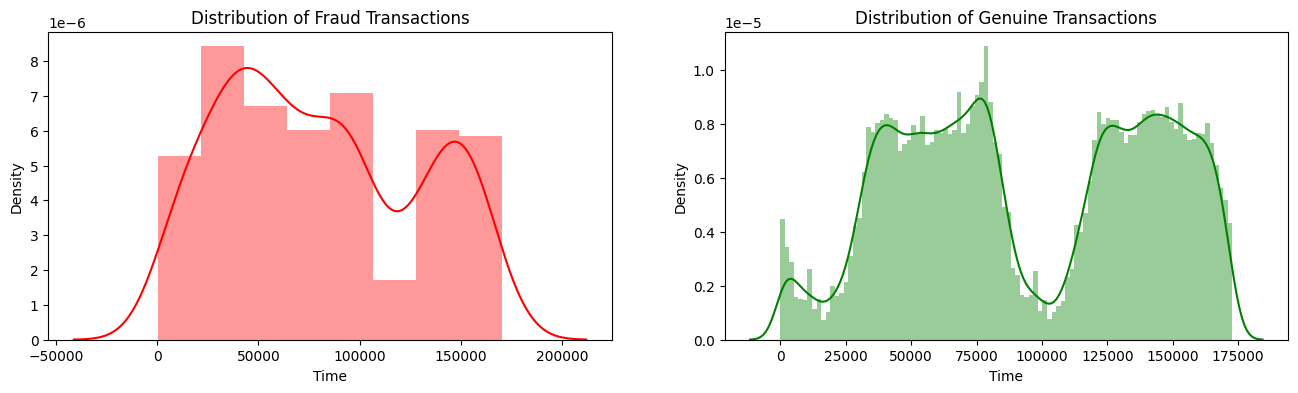

In [140]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(data[data['Class'] == 1]['Time'], color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(data[data['Class'] == 0]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [141]:
print("Fraud Transaction distribution : \n",data[(data['Class'] == 1)]['Amount'].value_counts().head())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


There are 113 fraud transactions for just one dollar and 27 fraud transaction for 99.99 dollars. There are also 27 transactions for zero amount

<Axes: >

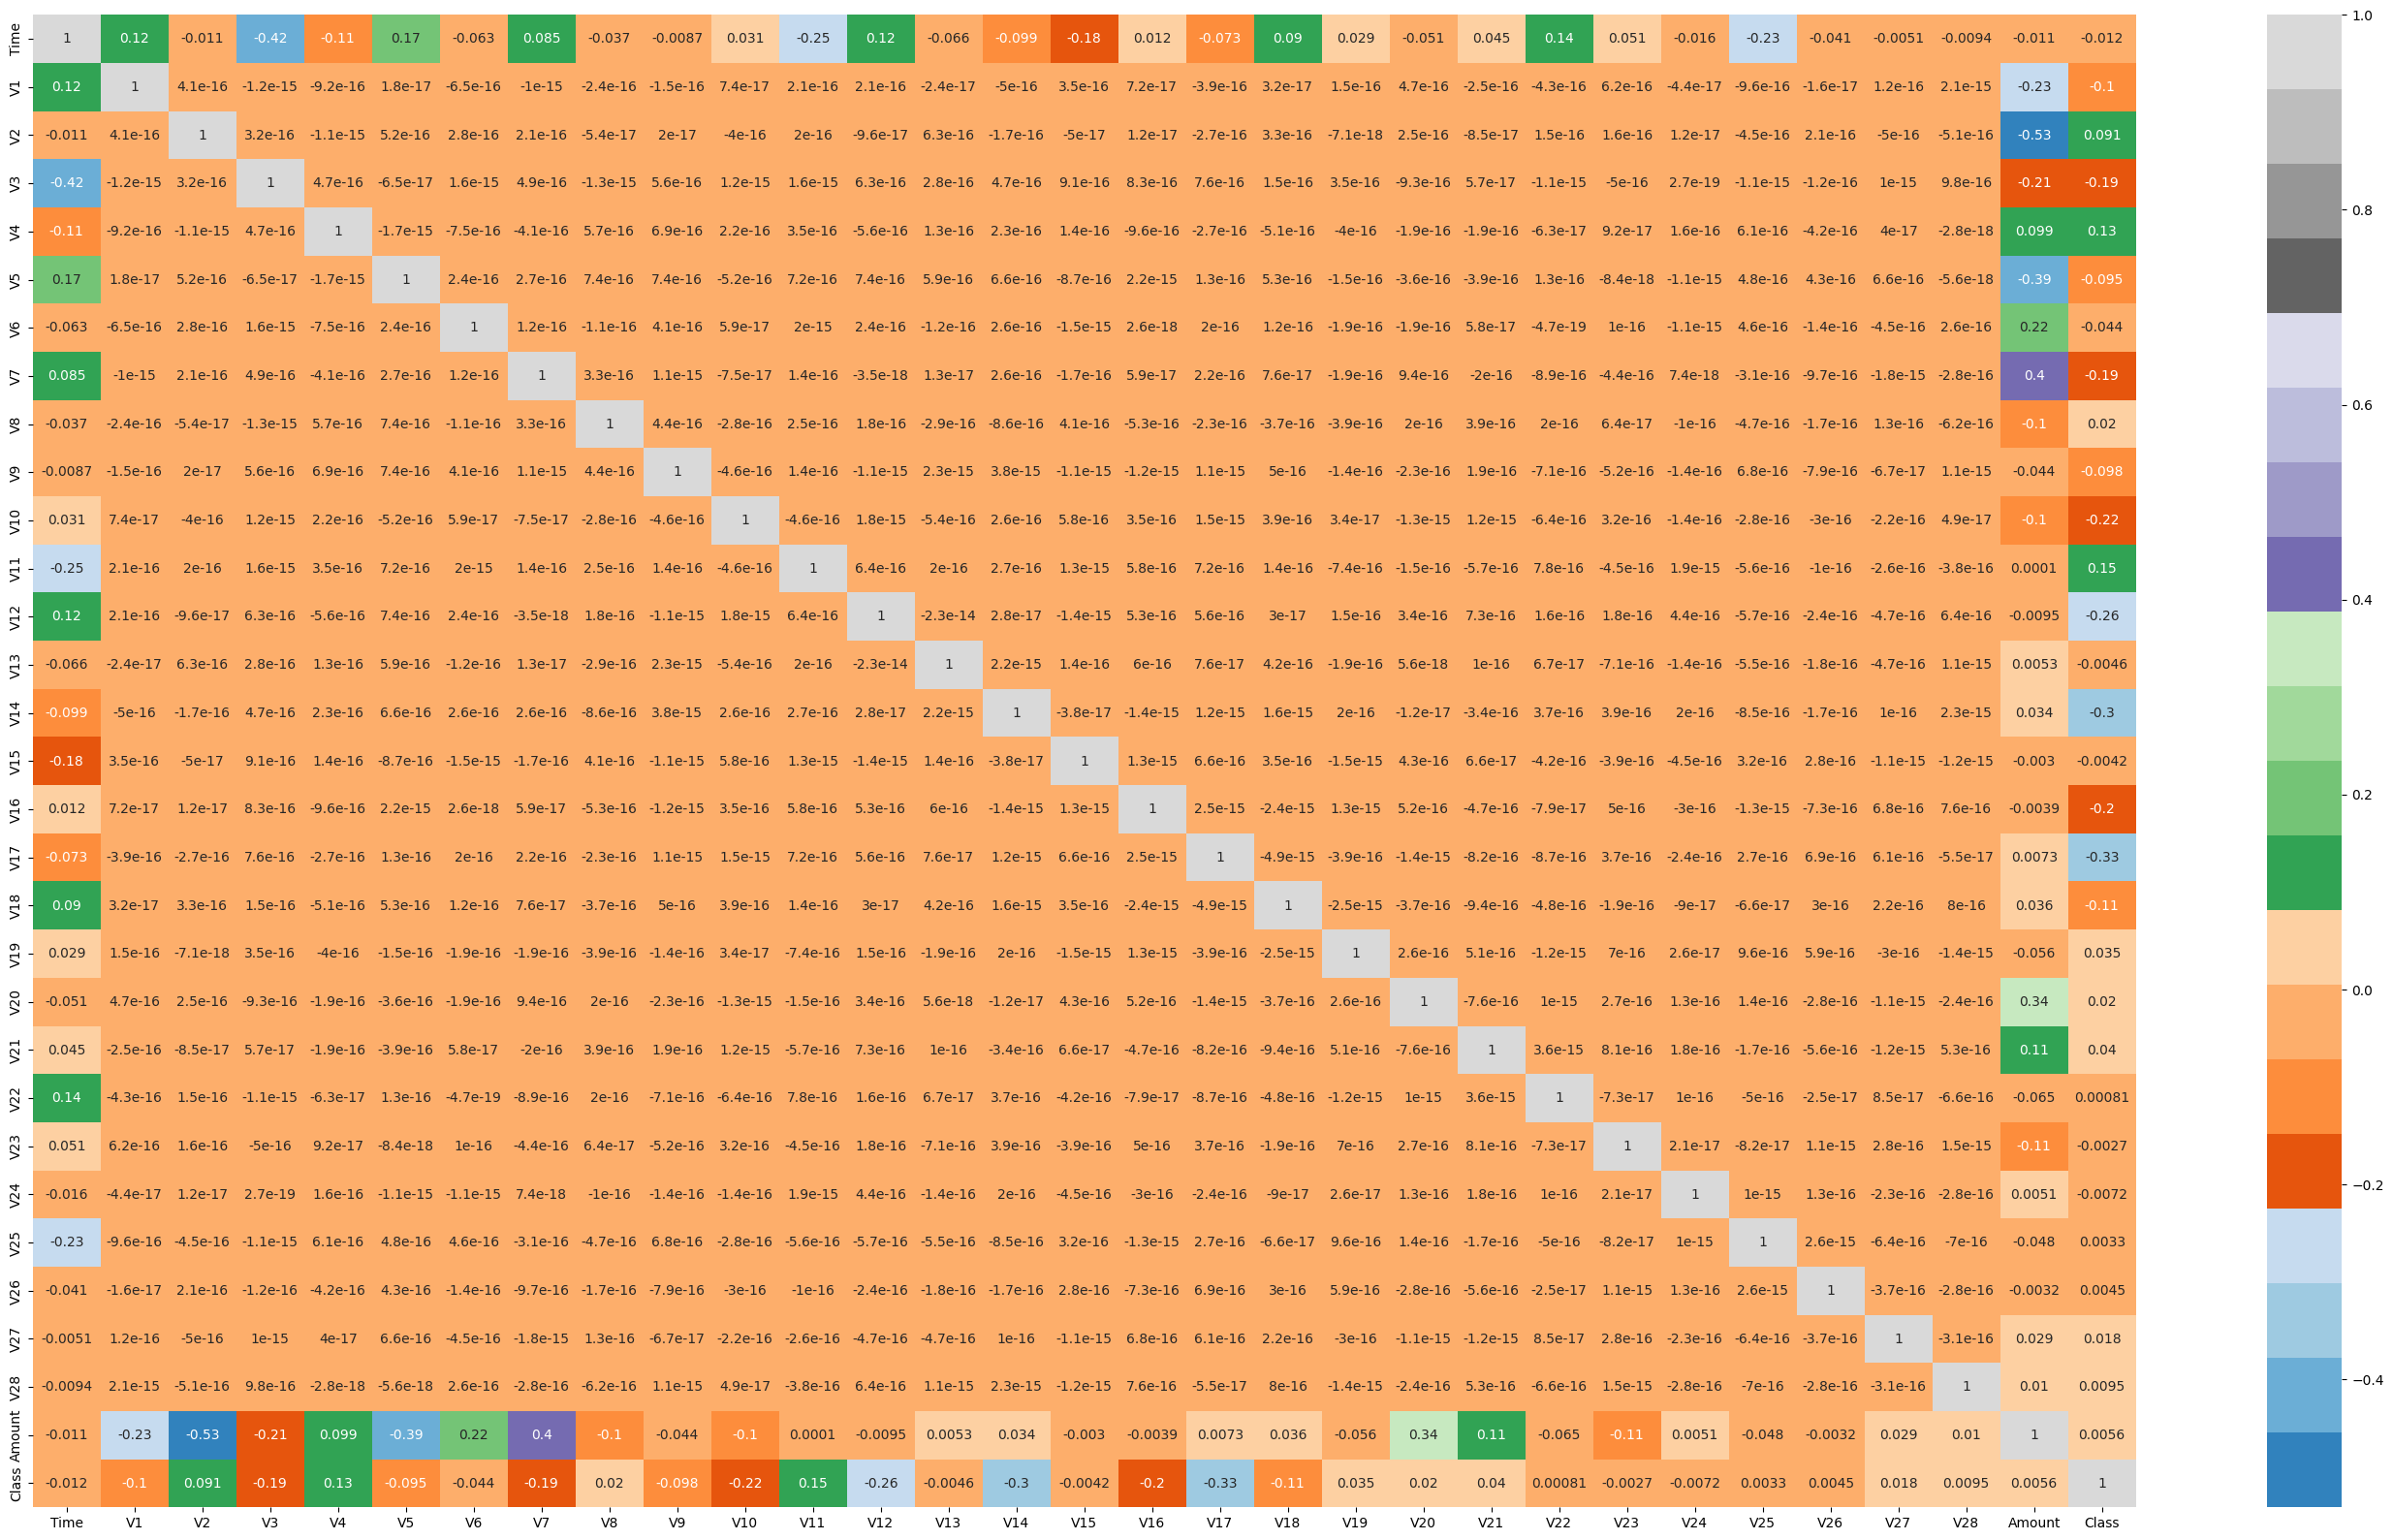

In [142]:
plt.figure(figsize=(35,20))
sns.heatmap(data.corr(),annot=True,cmap="tab20c")

# LightGBM Classifier

In [143]:
X_train, X_test, Y_train, Y_test = tts(x, y, test_size=0.35, random_state=42)

In [144]:
clf1 = LGBMClassifier()
clf1.fit(X_train, Y_train)

LGBMClassifier()

In [145]:
Y_pred_clf1 = clf1.predict(X_test)

In [146]:
print(classification_report(Y_test,Y_pred_clf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.19      0.51      0.27       158

    accuracy                           1.00     99683
   macro avg       0.59      0.75      0.63     99683
weighted avg       1.00      1.00      1.00     99683



In [147]:
confusion_matrix(Y_test,Y_pred_clf1)

array([[99175,   350],
       [   78,    80]])

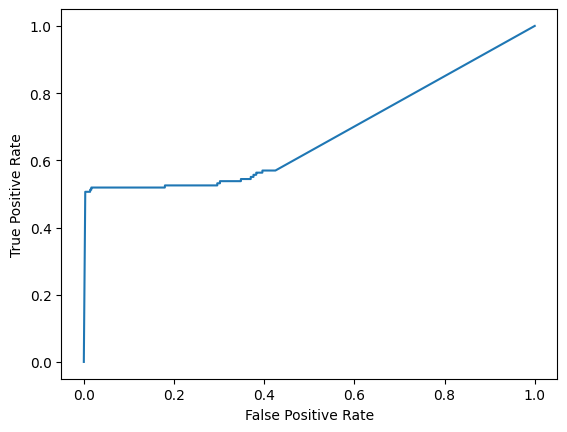

In [148]:
y_pred_proba = clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Hyperparameter tuning

In [149]:
params = {
    'max_depth': np.arange(2, 10, 1),
    'learning_rate': np.logspace(-4, 0, 100),
    'num_leaves': np.arange(10, 200, 5),
    'min_child_samples': np.arange(5, 30, 1),
}

In [150]:
random_search = RandomizedSearchCV(clf1, param_distributions=params, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146...
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_samples': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'num_leaves': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
                   random_state=42, scoring='f1', verbose=1)

In [151]:
clf1_tuned = LGBMClassifier(**random_search.best_params_)
clf1_tuned.fit(X_train, Y_train)
y_pred = clf1_tuned.predict(X_test)

In [152]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.95      0.54      0.69       158

    accuracy                           1.00     99683
   macro avg       0.97      0.77      0.85     99683
weighted avg       1.00      1.00      1.00     99683



In [153]:
confusion_matrix(Y_test, y_pred)

array([[99520,     5],
       [   72,    86]])

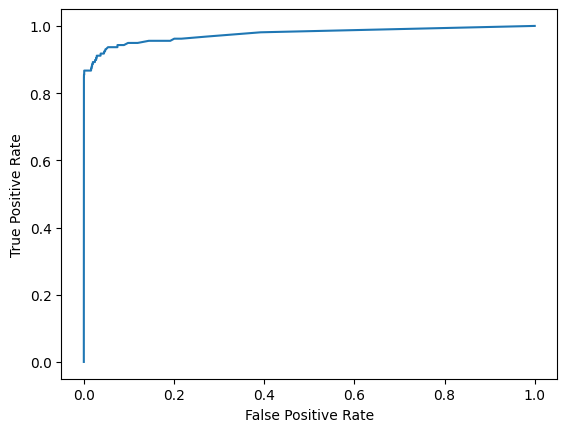

In [154]:
y_pred_proba = clf1_tuned.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PCA

Scaling

In [155]:
X_s = (x - x.mean()) / x.std()  

In [156]:
pca = PCA()
X_pca = pca.fit_transform(X_s)

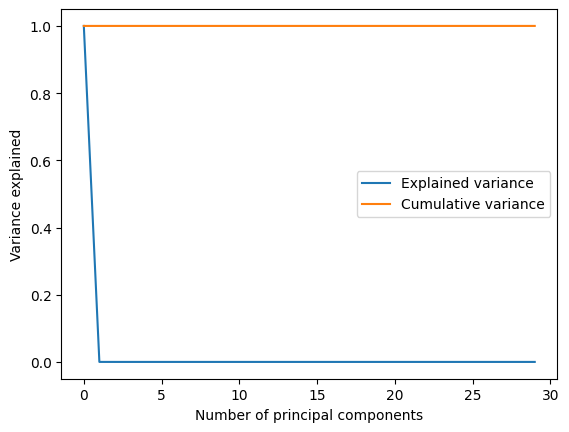

In [157]:
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)
plt.plot(explained_variances, label="Explained variance")
plt.plot(cumulative_variances, label="Cumulative variance")
plt.xlabel("Number of principal components")
plt.ylabel("Variance explained")
plt.legend()
plt.show()

In [158]:
print("Cumulative explained variance ratio:")
for i in range(1, 5):
    print(f"{i} principal components: {cumulative_variances[i-1]:.7f}")

Cumulative explained variance ratio:
1 principal components: 0.9999722
2 principal components: 1.0000000
3 principal components: 1.0000000
4 principal components: 1.0000000


We can see that the optimum number of Principal Components is 2

In [159]:
pca_optimum = PCA(n_components = 2)
X_pca = pca_optimum.fit_transform(X_s)

<Axes: >

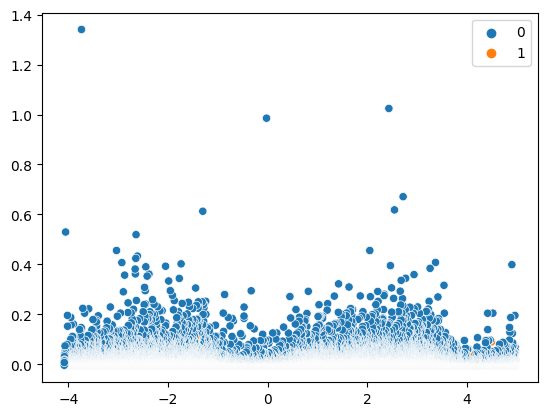

In [160]:
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = y)

In [161]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = tts(X_pca, y, test_size=0.35, random_state=42)

In [162]:
clf6 = DTC(random_state=42)
clf6.fit(X_train_pca, Y_train_pca)

DecisionTreeClassifier(random_state=42)

In [163]:
Y_pred_clf6 = clf6.predict(X_test_pca)

In [164]:
print(classification_report(Y_test, Y_pred_clf6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.13      0.13      0.13       158

    accuracy                           1.00     99683
   macro avg       0.56      0.57      0.56     99683
weighted avg       1.00      1.00      1.00     99683



In [165]:
confusion_matrix(Y_test_pca ,Y_pred_clf6)

array([[99384,   141],
       [  137,    21]])

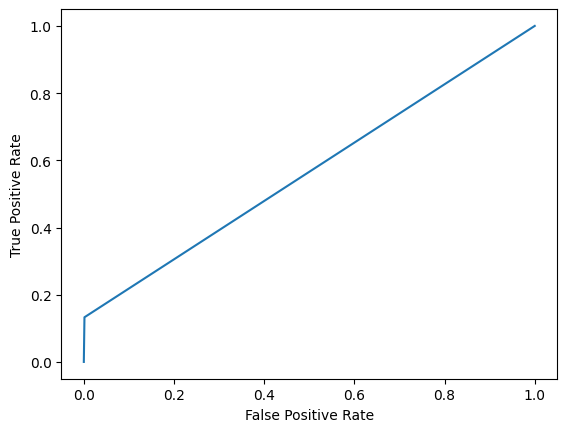

In [166]:
y_pred_proba = clf6.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_pca,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Using Smote on the dataset after PCA

In [225]:
oversample = SMOTE()
X_smote_pca, y_smote_pca = oversample.fit_resample(X_pca, y)

In [226]:
X_train_pcamote, X_test_pcamote, Y_train_pcamote, Y_test_smote = tts(X_smote_pca, y_smote_pca, test_size=0.35, random_state=42)

In [227]:
clf7 = LGBMClassifier()
clf7.fit(X_train_pcamote, Y_train_pcamote)

LGBMClassifier()

In [228]:
Y_pred_clf7 = clf7.predict(X_test_pcamote)

In [229]:
print(classification_report(Y_test_smote ,Y_pred_clf7))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     99438
           1       0.83      0.80      0.82     99583

    accuracy                           0.82    199021
   macro avg       0.82      0.82      0.82    199021
weighted avg       0.82      0.82      0.82    199021



In [230]:
confusion_matrix(Y_test_smote, Y_pred_clf7)

array([[83504, 15934],
       [19961, 79622]])

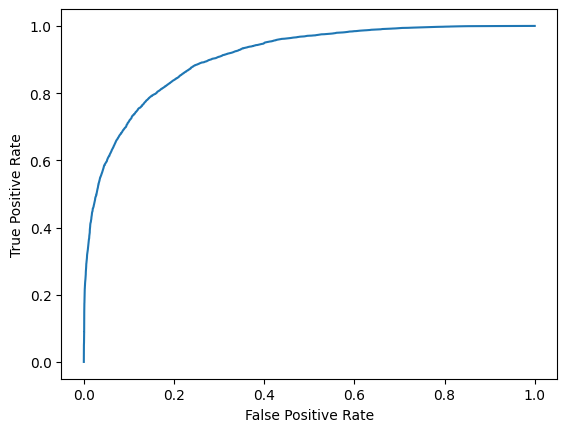

In [231]:
y_pred_proba = clf7.predict_proba(X_test_pcamote)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_smote,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Undersampling after PCA

In [174]:
undersample = NearMiss()
X_us_pca, y_us_pca = undersample.fit_resample(X_train_pca, Y_train_pca)

In [175]:
clf8 = LGBMClassifier()
clf8.fit(X_us_pca, y_us_pca)

LGBMClassifier()

In [176]:
Y_pred_clf8 = clf8.predict(X_test_pca)

In [177]:
print(classification_report(Y_test_pca ,Y_pred_clf8))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11     99525
           1       0.00      0.95      0.00       158

    accuracy                           0.06     99683
   macro avg       0.50      0.50      0.06     99683
weighted avg       1.00      0.06      0.11     99683



In [178]:
confusion_matrix(Y_test_pca ,Y_pred_clf8)

array([[ 5833, 93692],
       [    8,   150]])

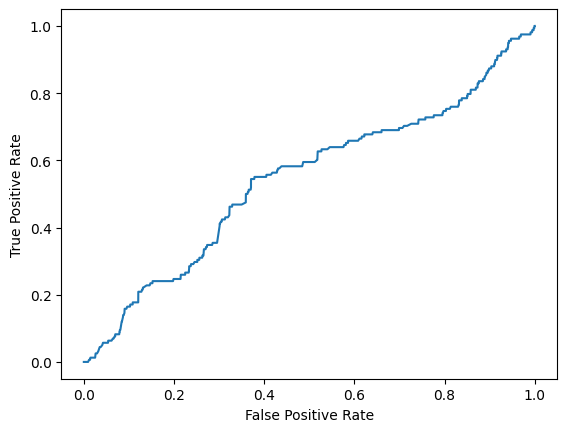

In [179]:
y_pred_proba = clf8.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_pca,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Under Sampling

In [180]:
y=np.array(y)
x=np.array(x)

In [181]:
pos_indices=np.where(Y_train==1)[0]
neg_indices=np.where(Y_train==0)[0]

In [182]:
pos_pts=[X_train[k] for k in pos_indices]
neg_pts=[X_train[k] for k in neg_indices]

In [183]:
pos_cent=np.mean(pos_pts,axis=0)
neg_cent=np.mean(neg_pts,axis=0)
r = np.linalg.norm(pos_cent - neg_cent)

In [184]:
np.shape(pos_cent)

(30,)

In [185]:
print(r)

15448.563621549089


In [186]:
samps=[]
for i in neg_pts:
  # print(np.linalg.norm(i - pos_cent))
  if(np.linalg.norm(i - pos_cent) < r):
    samps.append(i)

In [187]:
len(samps)

38208

In [188]:
dists=[]
for i in samps:
  samp=np.concatenate(([i],pos_pts))
  dist,_=NearestNeighbors(n_neighbors=3).fit(samp).kneighbors([i])
  dists.append(np.mean(dist))
print(dists)

[467.24463534251555, 315.9147209593406, 638.1432082358994, 260.1398919580645, 370.134157889526, 165.23116660901033, 717.6670632730933, 355.14825806414046, 538.283635431042, 855.6787335562207, 716.0806519643456, 882.7626822072039, 854.0807722782641, 319.1346164218847, 50.89076438893232, 654.8085267901671, 544.2773900995973, 405.3448505233603, 552.1896895927497, 164.65564426212043, 862.2209325455216, 195.86990520242784, 345.8901089045515, 854.0754431954898, 646.57020782592, 415.8157522267533, 636.5443541903752, 653.0440255924386, 92.99048482715945, 427.6190618898019, 668.7926679474059, 221.67909269369625, 425.169422851355, 155.78991555817345, 136.00433820416947, 882.5524084484682, 247.4587128735858, 301.70373786841003, 101.96668285339251, 295.09017835519404, 883.2170940877918, 882.6762994885194, 854.0827969408066, 88.08494548802128, 243.28195329800437, 315.30252510647006, 119.14176246150821, 882.8473678266774, 295.96165627244454, 87.16995278180825, 705.0822483225129, 286.5619518770018, 3

In [189]:
dists=np.array(dists)
samp_neg_inds=[]
for i in range(len(pos_pts)):
  samp_neg_inds.append(np.argmin(dists))
  dists=np.delete(dists,np.argmin(dists))
train_indices=np.concatenate((samp_neg_inds,pos_indices))

In [190]:
samp_pts=np.array([X_train[k] for k in samp_neg_inds])

In [191]:
len(samp_neg_inds)

334

In [192]:
len(train_indices)

668

In [193]:
# samp_neg_inds=np.random.choice(neg_indices,len(pos_indices),replace=False)
# train_indices=np.concatenate((samp_neg_inds,pos_indices))

In [194]:
# undersamps=[]
# l=len(pos_indices)
# for i in range(l):
#   k=random.randint(0,len(neg_indices)-len(undersamps)-1)
#   undersamps.append(neg_indices[k])
#   np.delete(neg_indices,k)
# train_indices=np.array(undersamps)
# train_indices=np.concatenate((train_indices,pos_indices))

In [195]:
us_x=np.array([X_train[k] for k in train_indices])
us_y=np.array([Y_train[k] for k in train_indices])

In [196]:
print(us_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

<Axes: >

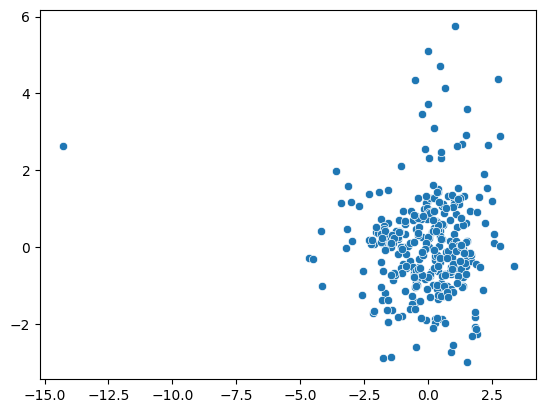

In [197]:
sns.scatterplot(x=samp_pts[:,3],y=samp_pts[:,4])

<Axes: >

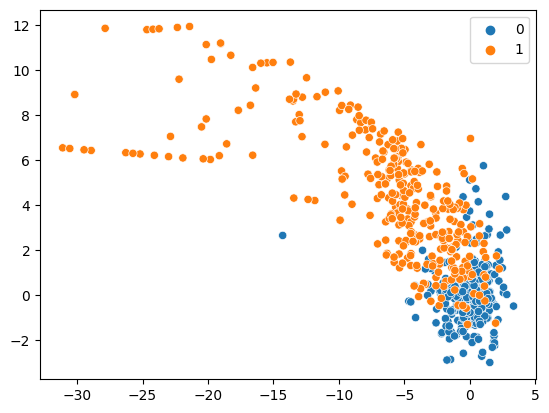

In [198]:
sns.scatterplot(x=us_x[:,3],y=us_x[:,4],hue=us_y)

(array([334.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 334.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

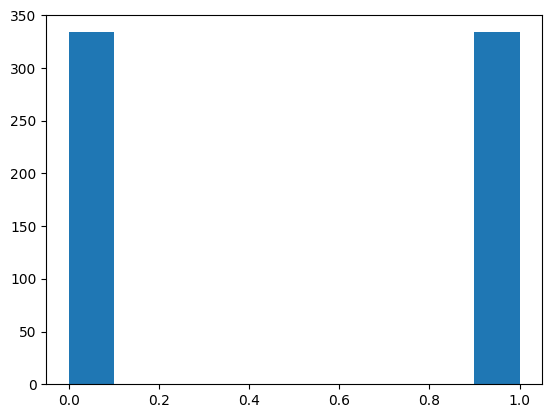

In [199]:
plt.hist(x=us_y)

In [200]:
# us_x_train,us_x_test,us_y_train,us_y_test=tts(us_x , us_y , test_size=0.35)

In [201]:
clf2=LGBMClassifier()
clf2.fit(us_x,us_y)

LGBMClassifier()

In [202]:
Y_pred_clf2 = clf2.predict(X_test)

In [203]:
print(classification_report(Y_test,Y_pred_clf2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     99525
           1       0.04      0.91      0.08       158

    accuracy                           0.97     99683
   macro avg       0.52      0.94      0.53     99683
weighted avg       1.00      0.97      0.98     99683



In [204]:
confusion_matrix(Y_test,Y_pred_clf2)
# FN    FP
# TN    TP

array([[96349,  3176],
       [   14,   144]])

# Over Sampling

In [205]:
pos_indices=np.where(Y_train==1)[0]
neg_indices=np.where(Y_train==0)[0]

In [206]:
pos_pts=np.array([X_train[k] for k in pos_indices])

In [207]:
_,nn=NearestNeighbors(n_neighbors=2).fit(pos_pts).kneighbors(pos_pts)

In [208]:
generated_pts=[]
generated_class=[]
for i in range(len(neg_indices)):
  k=random.randint(0,len(pos_indices)-1)
  a=pos_pts[nn[k][0]]
  b=pos_pts[nn[k][1]]
  r=random.uniform(0,1)
  g_pt=r*(a)+(1-r)*(b)
  generated_pts.append(g_pt)
  generated_class.append(1)
generated_pts=np.array(generated_pts)
generated_class=np.array(generated_class)

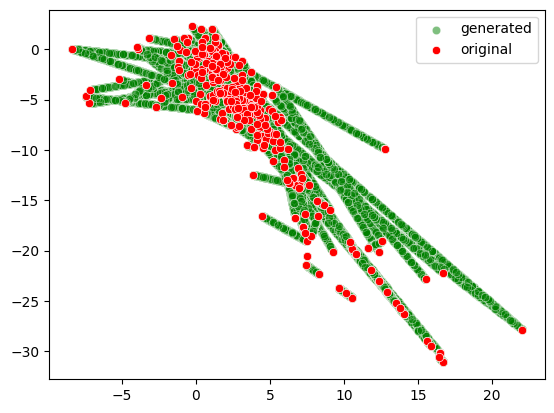

In [209]:
sns.scatterplot(x=generated_pts[:,2],y=generated_pts[:,3],alpha=0.5,color='green',label="generated")
sns.scatterplot(x=pos_pts[:,2],y=pos_pts[:,3],color='red',label="original")
plt.legend()

In [210]:
os_x=np.concatenate((X_train,generated_pts))
os_y=np.concatenate((Y_train,generated_class))

<Axes: >

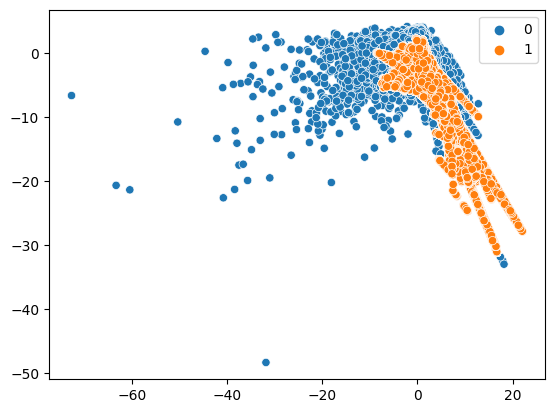

In [211]:
sns.scatterplot(x=os_x[:,2],y=os_x[:,3],hue=os_y)

(array([184790.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 185124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

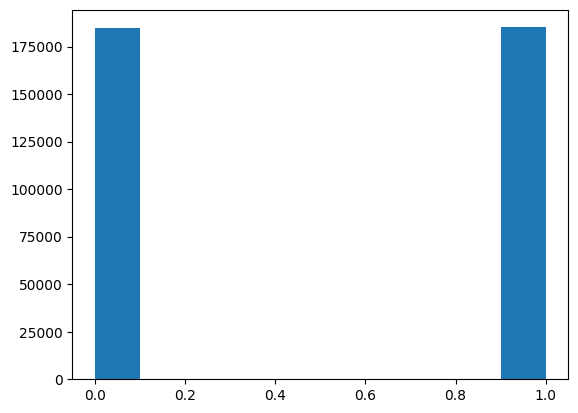

In [212]:
plt.hist(x=os_y)

In [213]:
os_x_train,os_x_test,os_y_train,os_y_test=tts(os_x,os_y,test_size=0.35)

In [214]:
clf_os=LGBMClassifier()
clf_os.fit(os_x,os_y)

LGBMClassifier()

In [215]:
Y_pred_clf_os = clf_os.predict(X_test)

In [216]:
print(classification_report(Y_test,Y_pred_clf_os))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.77      0.87      0.81       158

    accuracy                           1.00     99683
   macro avg       0.88      0.93      0.91     99683
weighted avg       1.00      1.00      1.00     99683



In [217]:
confusion_matrix(Y_test,Y_pred_clf_os)

array([[99483,    42],
       [   21,   137]])

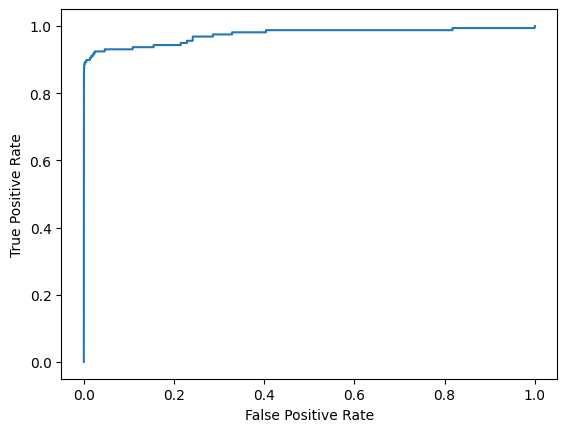

In [218]:
y_pred_proba = clf_os.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Boosting

In [219]:
clf4 = AdaBoostClassifier()
clf4.fit(X_train, Y_train)

AdaBoostClassifier()

In [220]:
Y_pred_clf4 = clf4.predict(X_test)
print(classification_report(Y_test, Y_pred_clf4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.81      0.77      0.79       158

    accuracy                           1.00     99683
   macro avg       0.90      0.88      0.89     99683
weighted avg       1.00      1.00      1.00     99683



In [221]:
confusion_matrix(Y_test, Y_pred_clf4)
# TP    FN
# FP    TN

array([[99496,    29],
       [   37,   121]])

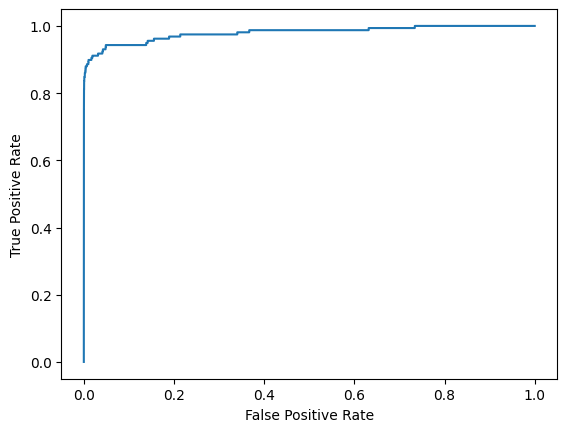

In [222]:
y_pred_proba = clf4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN

In [232]:
weights = 'distance' # use distance weights

knn = KNeighborsClassifier(n_neighbors=5, weights= weights)
knn.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [233]:
Y_pred_knn = knn.predict(X_test)

In [234]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       1.00      0.11      0.20       158

    accuracy                           1.00     99683
   macro avg       1.00      0.56      0.60     99683
weighted avg       1.00      1.00      1.00     99683



In [235]:
confusion_matrix(Y_test, Y_pred_knn)
# TP    FN
# FP    TN

array([[99525,     0],
       [  140,    18]])

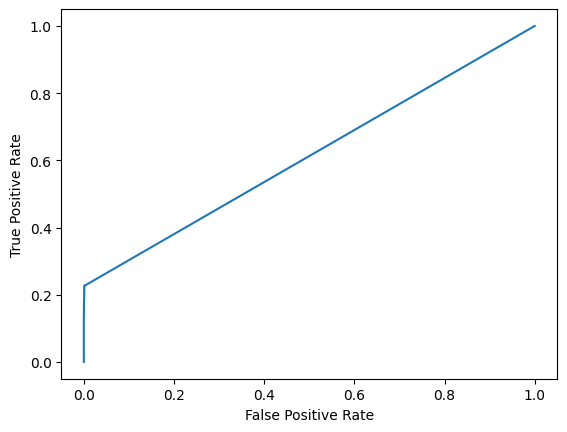

In [236]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Weighted Data

Weighted SVM

In [237]:
clf5=SVC(class_weight='balanced')
clf5.fit(X_train_pca, Y_train_pca)

SVC(class_weight='balanced')

In [238]:
class_weight.compute_class_weight('balanced', classes = np.unique(Y_train_pca), y = Y_train_pca)

array([  0.50090373, 277.13173653])

In [239]:
Y_pred_clf5 = clf5.predict(X_test_pca)
print(classification_report(Y_test, Y_pred_clf5))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82     99525
           1       0.00      0.48      0.00       158

    accuracy                           0.69     99683
   macro avg       0.50      0.58      0.41     99683
weighted avg       1.00      0.69      0.81     99683



In [240]:
confusion_matrix(Y_test, Y_pred_clf5)

array([[68545, 30980],
       [   82,    76]])

Hyperparameter Tuning

In [241]:
weights = np.linspace(0.05, 0.50, 8)
param_grid = {'class_weight' : [{0 : x, 1: 1.0-x} for x in weights]}
gsc = GridSearchCV(clf5, param_grid = param_grid, scoring = 'f1')
gsc.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': 'balanced',
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(class_weight='balanced'),
 'n_jobs': None,
 'param_grid': {'class_weight': [{0: 0.05, 1: 0.95},
   {0: 0.1142857142857143, 1: 0.8857142857142857},
   {0: 0.1785714285714286, 1: 0.8214285714285714},
   {0: 0.24285714285714288, 1: 0.7571428571428571},
   {0: 0.30714285714285716, 1: 0.6928571428571428},
   {0: 0.37142857142857144, 1: 0.6285714285714286},
   {0: 0.4357142857142858, 1: 0.5642857142857143},
   {0: 0.5, 1: 0.5}]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_t

In [242]:
gsc.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'class_weight': [{0: 0.05, 1: 0.95},
                                          {0: 0.1142857142857143,
                                           1: 0.8857142857142857},
                                          {0: 0.1785714285714286,
                                           1: 0.8214285714285714},
                                          {0: 0.24285714285714288,
                                           1: 0.7571428571428571},
                                          {0: 0.30714285714285716,
                                           1: 0.6928571428571428},
                                          {0: 0.37142857142857144,
                                           1: 0.6285714285714286},
                                          {0: 0.4357142857142858,
                                           1: 0.5642857142857143},
                                          {0: 0.5, 1: 0.5}]},
             scoring='f1')

In [243]:
print("Best hyperparameters:", gsc.best_params_)
print("F1 score:", gsc.best_score_)

Best hyperparameters: {'class_weight': {0: 0.05, 1: 0.95}}
F1 score: 0.0


# Voting Classifier

In [244]:
vote = VotingClassifier(estimators = [('lgmbm',clf1_tuned), ('oversampling',clf_os), ('adaboost',clf4)], voting='soft')
vote = vote.fit(X_train, Y_train)

In [245]:
Y_pred_vote = vote.predict(X_test)

In [246]:
print(classification_report(Y_test ,Y_pred_vote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.90      0.51      0.65       158

    accuracy                           1.00     99683
   macro avg       0.95      0.75      0.82     99683
weighted avg       1.00      1.00      1.00     99683



In [247]:
confusion_matrix(Y_test_pca ,Y_pred_vote)

array([[99516,     9],
       [   78,    80]])

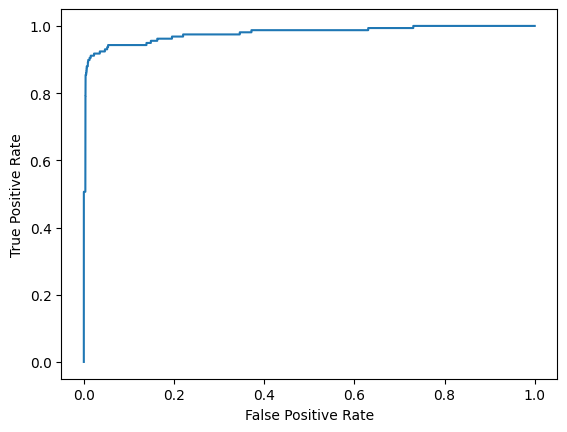

In [248]:
y_pred_proba = vote.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_pca,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Combination of successful methods

In [249]:
random_search1 = RandomizedSearchCV(clf_os, param_distributions=params, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
random_search1.fit(os_x, os_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146...
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_samples': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'num_leaves': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])},
                   random_state=42, scoring='f1', verbose=1)

In [250]:
clf_os_tuned=LGBMClassifier(**random_search1.best_params_)
clf_os_tuned.fit(os_x, os_y)

LGBMClassifier(learning_rate=0.24770763559917114, max_depth=8,
               min_child_samples=6, num_leaves=155)

In [251]:
clf_combi=AdaBoostClassifier(estimator=clf_os_tuned)
clf_combi.fit(os_x,os_y)

AdaBoostClassifier(estimator=LGBMClassifier(learning_rate=0.24770763559917114,
                                            max_depth=8, min_child_samples=6,
                                            num_leaves=155))

In [252]:
Y_pred_clf_combi = clf_combi.predict(X_test)
print(classification_report(Y_test, Y_pred_clf_combi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99525
           1       0.73      0.88      0.80       158

    accuracy                           1.00     99683
   macro avg       0.87      0.94      0.90     99683
weighted avg       1.00      1.00      1.00     99683

